In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from datetime import date, timedelta, datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pointbiserialr, spearmanr

print("Successful Import")

Successful Import


# I. Import NYC Real Estate 2020 Data Sets

In [2]:
os.chdir('C:/Users/willi/Documents/Data Science Practice Projects/Fordham Projects/CAPSTONE/')

# Manhattan, Brooklyn, Queens, Bronx, Staten Island 
manhattanDf = pd.read_csv(r'DATA/NYC 2020 Real Estate Sales Data/2020_manhattan.csv')
brooklynDf = pd.read_csv(r'DATA/NYC 2020 Real Estate Sales Data/2020_brooklyn.csv')
queensDf = pd.read_csv(r'DATA/NYC 2020 Real Estate Sales Data/2020_queens.csv')
bronxDf = pd.read_csv(r'DATA/NYC 2020 Real Estate Sales Data/2020_bronx.csv')
statenDf = pd.read_csv(r'DATA/NYC 2020 Real Estate Sales Data/2020_staten_island.csv')
print("Success")

Success


In [3]:
# Merge dfs into one
nycdf = pd.concat([manhattanDf, brooklynDf, queensDf, bronxDf, statenDf], ignore_index = True)
nycdf

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,FASHION,21 OFFICE BUILDINGS,4,804.0,67.0,NaN,O6,"146 WEST 29TH STREET, 11RW",NaN,...,0,4.0,4,"6,962","82,454",1910.0,4.0,O6,0,1/1/2020
1,1.0,FASHION,21 OFFICE BUILDINGS,4,804.0,67.0,NaN,O6,"146 WEST 29TH STREET, 11W",NaN,...,0,4.0,4,"6,962","82,454",1910.0,4.0,O6,0,1/1/2020
2,1.0,FASHION,21 OFFICE BUILDINGS,4,804.0,67.0,NaN,O6,"146 WEST 29TH STREET, 12E",NaN,...,0,4.0,4,"6,962","82,454",1910.0,4.0,O6,0,1/1/2020
3,1.0,FASHION,21 OFFICE BUILDINGS,4,804.0,67.0,NaN,O6,"146 WEST 29TH STREET, 12RE",NaN,...,0,4.0,4,"6,962","82,454",1910.0,4.0,O6,0,1/1/2020
4,1.0,FASHION,21 OFFICE BUILDINGS,4,804.0,67.0,NaN,O6,"146 WEST 29TH STREET, 12RW",NaN,...,0,4.0,4,"6,962","82,454",1910.0,4.0,O6,0,1/1/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nycdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 0 to 108549
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         68684 non-null  float64
 1   NEIGHBORHOOD                    68684 non-null  object 
 2   BUILDING CLASS CATEGORY         68684 non-null  object 
 3   TAX CLASS AT PRESENT            68644 non-null  object 
 4   BLOCK                           68684 non-null  float64
 5   LOT                             68684 non-null  float64
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       68644 non-null  object 
 8   ADDRESS                         68684 non-null  object 
 9   APARTMENT NUMBER                15061 non-null  object 
 10  ZIP CODE                        68673 non-null  float64
 11  RESIDENTIAL
UNITS               55809 non-null  object 
 12  COMMERCIAL
UNITS              

In [5]:
nycdf = nycdf.sort_values(by = ['SALE DATE'], ascending = True, ignore_index = True)
nycdf

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,FASHION,21 OFFICE BUILDINGS,4,804.0,67.0,NaN,O6,"146 WEST 29TH STREET, 11RW",NaN,...,0,4.0,4,"6,962","82,454",1910.0,4.0,O6,0,1/1/2020
1,4.0,WOODHAVEN,14 RENTALS - 4-10 UNIT,2A,8879.0,46.0,NaN,S4,91-01 85 AVENUE,NaN,...,4.0,1.0,5.0,"2,500","4,818",1943.0,2.0,S4,0,1/1/2020
2,3.0,BOROUGH PARK,10 COOPS - ELEVATOR APARTMENTS,2,5657.0,35.0,NaN,D4,"5100 15TH AVENUE, 3M",NaN,...,NaN,NaN,NaN,NaN,NaN,1931.0,2.0,D4,"395,000",1/1/2020
3,2.0,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4707.0,19.0,NaN,V0,N/A EAST 212 STREET,NaN,...,0.0,0.0,0.0,"2,199",0,NaN,1.0,V0,0,1/1/2020
4,2.0,BAYCHESTER,07 RENTALS - WALKUP APARTMENTS,2A,4707.0,16.0,NaN,C2,1147 EAST 212TH STREET,NaN,...,5.0,0.0,5.0,"2,169","3,800",1930.0,2.0,C2,0,1/1/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nycdf = nycdf.drop(columns = ['TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS', 'APARTMENT NUMBER'])
nycdf

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,FASHION,21 OFFICE BUILDINGS,804.0,67.0,10001.0,0,4.0,4,"6,962","82,454",1910.0,4.0,O6,0,1/1/2020
1,4.0,WOODHAVEN,14 RENTALS - 4-10 UNIT,8879.0,46.0,11421.0,4.0,1.0,5.0,"2,500","4,818",1943.0,2.0,S4,0,1/1/2020
2,3.0,BOROUGH PARK,10 COOPS - ELEVATOR APARTMENTS,5657.0,35.0,11219.0,NaN,NaN,NaN,NaN,NaN,1931.0,2.0,D4,"395,000",1/1/2020
3,2.0,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,4707.0,19.0,10469.0,0.0,0.0,0.0,"2,199",0,NaN,1.0,V0,0,1/1/2020
4,2.0,BAYCHESTER,07 RENTALS - WALKUP APARTMENTS,4707.0,16.0,10469.0,5.0,0.0,5.0,"2,169","3,800",1930.0,2.0,C2,0,1/1/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Desired NYC Building Classification Codes - Single Family Residentials
resClass = ['A4', 'A5', 'A7', 'A9', 'R1', 'R2', 'R3', 'R4', 'R6', 'R7', 'R8', 'R9']

filtered_nycdf = nycdf[nycdf['BUILDING CLASS\nAT TIME OF SALE'].isin(resClass)]
filtered_nycdf.reset_index(drop=True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,MURRAY HILL,17 CONDO COOPS,885.0,1304.0,10016.0,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,R9,0,1/1/2020
1,1.0,HARLEM-WEST,13 CONDOS - ELEVATOR APARTMENTS,1988.0,1126.0,10031.0,1,0.0,1,0,0,2006.0,2.0,R4,0,1/1/2020
2,1.0,GREENWICH VILLAGE-WEST,17 CONDO COOPS,612.0,1102.0,10014.0,NaN,NaN,NaN,NaN,NaN,1910.0,2.0,R9,0,1/1/2020
3,5.0,CONCORD-FOX HILLS,01 ONE FAMILY DWELLINGS,2925.0,93.0,10304.0,1.0,0.0,1.0,"1,380","1,204",1992.0,1.0,A5,0,1/1/2020
4,4.0,FLUSHING-SOUTH,01 ONE FAMILY DWELLINGS,6527.0,81.0,11367.0,1.0,0.0,1.0,"2,214","1,744",1950.0,1.0,A5,0,1/1/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20467,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1239.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"2,101,389",9/9/2020
20468,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1232.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"27,818,354",9/9/2020
20469,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1231.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"1,723,248",9/9/2020
20470,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1229.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"27,818,354",9/9/2020


In [8]:
filtered_nycdf2 = filtered_nycdf[filtered_nycdf['SALE PRICE'] != '0']
filtered_nycdf2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
79,1.0,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,919.0,1201.0,10016.0,1,0.0,1,0,0,2016.0,2.0,R4,"1,936,675",1/10/2020
81,1.0,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,920.0,1169.0,10016.0,1,0.0,1,0,0,1988.0,2.0,R4,"515,000",1/10/2020
82,1.0,SOHO,13 CONDOS - ELEVATOR APARTMENTS,578.0,1051.0,10013.0,1,0.0,1,0,0,2016.0,2.0,R4,"2,875,000",1/10/2020
85,1.0,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1269.0,1345.0,10019.0,1,0.0,1,0,0,2015.0,2.0,R4,"8,450,000",1/10/2020
89,1.0,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1346.0,1001.0,10022.0,1,0.0,1,0,0,1959.0,2.0,R4,"550,000",1/10/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68677,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1239.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"2,101,389",9/9/2020
68678,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1232.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"27,818,354",9/9/2020
68679,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1231.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"1,723,248",9/9/2020
68680,4.0,ELMHURST,13 CONDOS - ELEVATOR APARTMENTS,1536.0,1229.0,11373.0,1.0,0.0,1.0,0,0,2016.0,2.0,R4,"27,818,354",9/9/2020


In [9]:
filtered_nycdf2.dtypes

BOROUGH                            float64
NEIGHBORHOOD                        object
BUILDING CLASS CATEGORY             object
BLOCK                              float64
LOT                                float64
ZIP CODE                           float64
RESIDENTIAL\nUNITS                  object
COMMERCIAL\nUNITS                  float64
TOTAL \nUNITS                       object
LAND \nSQUARE FEET                  object
GROSS \nSQUARE FEET                 object
YEAR BUILT                         float64
TAX CLASS AT TIME OF SALE          float64
BUILDING CLASS\nAT TIME OF SALE     object
SALE PRICE                          object
SALE DATE                           object
dtype: object

In [10]:
# Change data type for 'SALE PRICE' to float
filtered_nycdf2['SALE PRICE'] = filtered_nycdf2['SALE PRICE'].replace(',','', regex=True)
filtered_nycdf2['SALE PRICE'] = filtered_nycdf2['SALE PRICE'].astype(float)
filtered_nycdf2['SALE PRICE']

<ipython-input-10-f92e4af58938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_nycdf2['SALE PRICE'] = filtered_nycdf2['SALE PRICE'].replace(',','', regex=True)
<ipython-input-10-f92e4af58938>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_nycdf2['SALE PRICE'] = filtered_nycdf2['SALE PRICE'].astype(float)


79        1936675.0
81         515000.0
82        2875000.0
85        8450000.0
89         550000.0
            ...    
68677     2101389.0
68678    27818354.0
68679     1723248.0
68680    27818354.0
68681     3757695.0
Name: SALE PRICE, Length: 14519, dtype: float64

In [11]:
# Check to see number of unique sale dates
print(len(filtered_nycdf2['SALE DATE'].unique()))

300


In [12]:
# Convert 'SALE DATE' attribute to datetime data type.
filtered_nycdf2['SALE DATE'] = pd.to_datetime(filtered_nycdf2['SALE DATE'])
filtered_nycdf2['SALE DATE']

<ipython-input-12-fbeb9d332eba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_nycdf2['SALE DATE'] = pd.to_datetime(filtered_nycdf2['SALE DATE'])


79      2020-01-10
81      2020-01-10
82      2020-01-10
85      2020-01-10
89      2020-01-10
           ...    
68677   2020-09-09
68678   2020-09-09
68679   2020-09-09
68680   2020-09-09
68681   2020-09-09
Name: SALE DATE, Length: 14519, dtype: datetime64[ns]

In [13]:
filtered_nycdf2 = filtered_nycdf2.sort_values(by = ['SALE DATE'], ascending = True, ignore_index = True)
filtered_nycdf2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,4.0,MIDDLE VILLAGE,04 TAX CLASS 1 CONDOS,3049.0,1013.0,11379.0,1.0,0.0,1.0,0,0,1976.0,1.0,R3,350000.0,2020-01-02
1,4.0,REGO PARK,13 CONDOS - ELEVATOR APARTMENTS,2112.0,1004.0,11374.0,1.0,0.0,1.0,0,0,1949.0,2.0,R4,495000.0,2020-01-02
2,3.0,SHEEPSHEAD BAY,04 TAX CLASS 1 CONDOS,8797.0,1006.0,11235.0,1.0,0.0,1.0,0,0,2005.0,1.0,R3,600000.0,2020-01-02
3,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,1170.0,1010.0,10024.0,NaN,NaN,NaN,NaN,NaN,1975.0,2.0,R9,726500.0,2020-01-02
4,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,1125.0,1270.0,10023.0,1,0.0,1,0,0,1924.0,2.0,R4,1700000.0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14514,5.0,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,5735.0,409.0,10312.0,1.0,0.0,1.0,"6,673","1,552",2011.0,1.0,A5,680000.0,2020-12-31
14515,5.0,BULLS HEAD,01 ONE FAMILY DWELLINGS,1622.0,48.0,10314.0,1.0,0.0,1.0,"2,288","1,372",1981.0,1.0,A5,363000.0,2020-12-31
14516,5.0,CONCORD,01 ONE FAMILY DWELLINGS,2899.0,195.0,10304.0,1.0,0.0,1.0,555,"1,150",2004.0,1.0,A5,450000.0,2020-12-31
14517,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,1171.0,4850.0,10023.0,1,0.0,1,0,0,2016.0,2.0,R4,3465000.0,2020-12-31


In [14]:
print('# Unique Values RESIDENTIAL UNITS: ',len(filtered_nycdf2['RESIDENTIAL\nUNITS'].unique()), 
    '; # Unique Values COMMERCIAL UNITS: ',len(filtered_nycdf2['COMMERCIAL\nUNITS'].unique()), 
    '; # Unique Values TOTAL UNITS UNITS: ',len(filtered_nycdf2['TOTAL \nUNITS'].unique()))
print(filtered_nycdf2['RESIDENTIAL\nUNITS'].unique())
print(filtered_nycdf2['COMMERCIAL\nUNITS'].unique())
print(filtered_nycdf2['TOTAL \nUNITS'].unique())

# Unique Values RESIDENTIAL UNITS:  5 ; # Unique Values COMMERCIAL UNITS:  2 ; # Unique Values TOTAL UNITS UNITS:  5
[1.0 nan '1' 2.0 0.0]
[ 0. nan]
[1.0 nan '1' 2.0 0.0]


In [15]:
filtered_nycdf2 = filtered_nycdf2.drop(columns = ['COMMERCIAL\nUNITS','TOTAL \nUNITS'])
filtered_nycdf2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL\nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,4.0,MIDDLE VILLAGE,04 TAX CLASS 1 CONDOS,3049.0,1013.0,11379.0,1.0,0,0,1976.0,1.0,R3,350000.0,2020-01-02
1,4.0,REGO PARK,13 CONDOS - ELEVATOR APARTMENTS,2112.0,1004.0,11374.0,1.0,0,0,1949.0,2.0,R4,495000.0,2020-01-02
2,3.0,SHEEPSHEAD BAY,04 TAX CLASS 1 CONDOS,8797.0,1006.0,11235.0,1.0,0,0,2005.0,1.0,R3,600000.0,2020-01-02
3,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,1170.0,1010.0,10024.0,NaN,NaN,NaN,1975.0,2.0,R9,726500.0,2020-01-02
4,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,1125.0,1270.0,10023.0,1,0,0,1924.0,2.0,R4,1700000.0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14514,5.0,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,5735.0,409.0,10312.0,1.0,"6,673","1,552",2011.0,1.0,A5,680000.0,2020-12-31
14515,5.0,BULLS HEAD,01 ONE FAMILY DWELLINGS,1622.0,48.0,10314.0,1.0,"2,288","1,372",1981.0,1.0,A5,363000.0,2020-12-31
14516,5.0,CONCORD,01 ONE FAMILY DWELLINGS,2899.0,195.0,10304.0,1.0,555,"1,150",2004.0,1.0,A5,450000.0,2020-12-31
14517,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,1171.0,4850.0,10023.0,1,0,0,2016.0,2.0,R4,3465000.0,2020-12-31


In [16]:
filtered_nycdf2 = filtered_nycdf2.rename(columns = {'RESIDENTIAL\nUNITS': 'RESIDENTIAL UNITS', 'LAND \nSQUARE FEET':'LAND SQFT', 
                                                   'GROSS \nSQUARE FEET': 'GROSS SQFT', 'BUILDING CLASS\nAT TIME OF SALE': 'BUILDING CLASS AT TIME OF SALE'})
filtered_nycdf2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4.0,MIDDLE VILLAGE,04 TAX CLASS 1 CONDOS,3049.0,1013.0,11379.0,1.0,0,0,1976.0,1.0,R3,350000.0,2020-01-02
1,4.0,REGO PARK,13 CONDOS - ELEVATOR APARTMENTS,2112.0,1004.0,11374.0,1.0,0,0,1949.0,2.0,R4,495000.0,2020-01-02
2,3.0,SHEEPSHEAD BAY,04 TAX CLASS 1 CONDOS,8797.0,1006.0,11235.0,1.0,0,0,2005.0,1.0,R3,600000.0,2020-01-02
3,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,1170.0,1010.0,10024.0,NaN,NaN,NaN,1975.0,2.0,R9,726500.0,2020-01-02
4,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,1125.0,1270.0,10023.0,1,0,0,1924.0,2.0,R4,1700000.0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14514,5.0,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,5735.0,409.0,10312.0,1.0,"6,673","1,552",2011.0,1.0,A5,680000.0,2020-12-31
14515,5.0,BULLS HEAD,01 ONE FAMILY DWELLINGS,1622.0,48.0,10314.0,1.0,"2,288","1,372",1981.0,1.0,A5,363000.0,2020-12-31
14516,5.0,CONCORD,01 ONE FAMILY DWELLINGS,2899.0,195.0,10304.0,1.0,555,"1,150",2004.0,1.0,A5,450000.0,2020-12-31
14517,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,1171.0,4850.0,10023.0,1,0,0,2016.0,2.0,R4,3465000.0,2020-12-31


In [17]:
# Drop Nulls
newdf = filtered_nycdf2.dropna()

In [18]:
abbr_numdf = newdf.drop(columns = ['NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'BLOCK', 'LOT'])
abbr_numdf

,BOROUGH,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4.0,11379.0,1.0,0,0,1976.0,1.0,R3,350000.0,2020-01-02
1,4.0,11374.0,1.0,0,0,1949.0,2.0,R4,495000.0,2020-01-02
2,3.0,11235.0,1.0,0,0,2005.0,1.0,R3,600000.0,2020-01-02
4,1.0,10023.0,1,0,0,1924.0,2.0,R4,1700000.0,2020-01-02
5,1.0,10075.0,1,0,0,1974.0,2.0,R4,805000.0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...
14514,5.0,10312.0,1.0,"6,673","1,552",2011.0,1.0,A5,680000.0,2020-12-31
14515,5.0,10314.0,1.0,"2,288","1,372",1981.0,1.0,A5,363000.0,2020-12-31
14516,5.0,10304.0,1.0,555,"1,150",2004.0,1.0,A5,450000.0,2020-12-31
14517,1.0,10023.0,1,0,0,2016.0,2.0,R4,3465000.0,2020-12-31


In [19]:
abbr_numdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11983 entries, 0 to 14518
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         11983 non-null  float64       
 1   ZIP CODE                        11983 non-null  float64       
 2   RESIDENTIAL UNITS               11983 non-null  object        
 3   LAND SQFT                       11983 non-null  object        
 4   GROSS SQFT                      11983 non-null  object        
 5   YEAR BUILT                      11983 non-null  float64       
 6   TAX CLASS AT TIME OF SALE       11983 non-null  float64       
 7   BUILDING CLASS AT TIME OF SALE  11983 non-null  object        
 8   SALE PRICE                      11983 non-null  float64       
 9   SALE DATE                       11983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.0+ MB


In [20]:
# Want data from the time of the start of the pandemic and onwards, thus a bottom limit is set at February 29, 2020
min_date = datetime(2020, 2, 29)
abbr_numdf = abbr_numdf[abbr_numdf['SALE DATE'] >= min_date] 
abbr_numdf = abbr_numdf.reset_index()
abbr_numdf

,index,BOROUGH,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2921,4.0,11377.0,1.0,"2,100","1,384",1930.0,1.0,A5,50.0,2020-02-29
1,2922,4.0,11421.0,1.0,0,0,1978.0,1.0,R3,935000.0,2020-03-02
2,2923,4.0,11101.0,1.0,0,0,2018.0,2.0,R1,1250000.0,2020-03-02
3,2924,4.0,11379.0,1.0,"1,600","1,110",1940.0,1.0,A5,692800.0,2020-03-02
4,2925,4.0,11374.0,1.0,0,0,2017.0,2.0,R4,698700.0,2020-03-02
...,...,...,...,...,...,...,...,...,...,...,...
9619,14514,5.0,10312.0,1.0,"6,673","1,552",2011.0,1.0,A5,680000.0,2020-12-31
9620,14515,5.0,10314.0,1.0,"2,288","1,372",1981.0,1.0,A5,363000.0,2020-12-31
9621,14516,5.0,10304.0,1.0,555,"1,150",2004.0,1.0,A5,450000.0,2020-12-31
9622,14517,1.0,10023.0,1,0,0,2016.0,2.0,R4,3465000.0,2020-12-31


In [21]:
abbr_numdf = abbr_numdf.rename(columns = {'SALE DATE': 'DATE', "BOROUGH":"BORO"})
abbr_numdf = abbr_numdf.reset_index()
abbr_numdf = abbr_numdf.drop(columns = ['level_0', 'index'])
abbr_numdf['BORO'] = abbr_numdf['BORO'].astype('int')
abbr_numdf.head()

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE
0,4,11377.0,1.0,"2,100","1,384",1930.0,1.0,A5,50.0,2020-02-29
1,4,11421.0,1.0,0,0,1978.0,1.0,R3,935000.0,2020-03-02
2,4,11101.0,1.0,0,0,2018.0,2.0,R1,1250000.0,2020-03-02
3,4,11379.0,1.0,"1,600","1,110",1940.0,1.0,A5,692800.0,2020-03-02
4,4,11374.0,1.0,0,0,2017.0,2.0,R4,698700.0,2020-03-02


# II. Cleaning of COVID-19 Data

In [22]:
covidnycdf = pd.read_csv(r'DATA/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv')
covidnycdf.head()

,DATE_OF_INTEREST,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,si_probable_case_count,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,si_probable_death_count,SI_CASE_COUNT_7DAY_AVG,si_all_case_count_7day_avg,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,si_all_death_count_7day_avg,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
covidnycdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DATE_OF_INTEREST                592 non-null    object
 1   CASE_COUNT                      592 non-null    int64 
 2   probable_case_count             592 non-null    int64 
 3   HOSPITALIZED_COUNT              592 non-null    int64 
 4   DEATH_COUNT                     592 non-null    int64 
 5   DEATH_COUNT_PROBABLE            592 non-null    int64 
 6   CASE_COUNT_7DAY_AVG             592 non-null    int64 
 7   all_case_count_7day_avg         592 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG             592 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG            592 non-null    int64 
 10  all_death_count_7day_avg        592 non-null    int64 
 11  BX_CASE_COUNT                   592 non-null    int64 
 12  bx_probable_case_count          592 non-null    in

In [24]:
covidnycdf['DATE_OF_INTEREST'] = pd.to_datetime(covidnycdf['DATE_OF_INTEREST'])
covidnycdf = covidnycdf.rename(columns = {'DATE_OF_INTEREST':'DATE'})
covidnycdf['DATE']

0     2020-02-29
1     2020-03-01
2     2020-03-02
3     2020-03-03
4     2020-03-04
         ...    
587   2021-10-08
588   2021-10-09
589   2021-10-10
590   2021-10-11
591   2021-10-12
Name: DATE, Length: 592, dtype: datetime64[ns]

In [25]:
# Want data points from 2020, so max date is January 1, 2021
max_date = datetime(2021, 1, 1)
covidnycdf = covidnycdf[covidnycdf['DATE'] <= max_date] 
covidnycdf

,DATE,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,si_probable_case_count,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,si_probable_death_count,SI_CASE_COUNT_7DAY_AVG,si_all_case_count_7day_avg,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,si_all_death_count_7day_avg,INCOMPLETE
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2020-12-28,5387,1196,348,43,3,3390,4266,283,42,...,89,20,7,0,338,415,19,6,6,0
304,2020-12-29,5204,1001,318,50,4,3548,4432,288,42,...,80,19,9,0,369,447,18,6,6,0
305,2020-12-30,4983,1052,314,40,5,3710,4611,290,42,...,92,19,4,1,379,457,18,6,6,0
306,2020-12-31,3390,771,281,41,1,3764,4684,291,42,...,71,20,3,0,400,481,19,6,6,0


In [26]:
lst1 = []
# Create a list of lists of 7 instances of the number n, where the n is of a value from 1 to 44 and when the count of n's in a sublist exceeds 7, a new list is formed and appended.
for n in range(1,45):
    if lst1.count(n) <= 7:
        mult = [n,n,n,n,n,n,n]
        lst1.append(mult)
    else:
        n = n + 1

print(lst1,'\n')

# Concat all lists in lst1 into one list, concat_lst1 
concat_lst1 = []
for i in lst1:
    concat_lst1 += i

print(concat_lst1, '\n')
print(len(concat_lst1))

[[1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 4, 4, 4], [5, 5, 5, 5, 5, 5, 5], [6, 6, 6, 6, 6, 6, 6], [7, 7, 7, 7, 7, 7, 7], [8, 8, 8, 8, 8, 8, 8], [9, 9, 9, 9, 9, 9, 9], [10, 10, 10, 10, 10, 10, 10], [11, 11, 11, 11, 11, 11, 11], [12, 12, 12, 12, 12, 12, 12], [13, 13, 13, 13, 13, 13, 13], [14, 14, 14, 14, 14, 14, 14], [15, 15, 15, 15, 15, 15, 15], [16, 16, 16, 16, 16, 16, 16], [17, 17, 17, 17, 17, 17, 17], [18, 18, 18, 18, 18, 18, 18], [19, 19, 19, 19, 19, 19, 19], [20, 20, 20, 20, 20, 20, 20], [21, 21, 21, 21, 21, 21, 21], [22, 22, 22, 22, 22, 22, 22], [23, 23, 23, 23, 23, 23, 23], [24, 24, 24, 24, 24, 24, 24], [25, 25, 25, 25, 25, 25, 25], [26, 26, 26, 26, 26, 26, 26], [27, 27, 27, 27, 27, 27, 27], [28, 28, 28, 28, 28, 28, 28], [29, 29, 29, 29, 29, 29, 29], [30, 30, 30, 30, 30, 30, 30], [31, 31, 31, 31, 31, 31, 31], [32, 32, 32, 32, 32, 32, 32], [33, 33, 33, 33, 33, 33, 33], [34, 34, 34, 34, 34, 34, 34], [35, 35, 35, 35, 35, 35, 35], [36, 36, 36,

In [27]:
covidnycdf['WEEK #'] = concat_lst1
covidnycdf['WEEK #'].tail(10)

298    43
299    43
300    43
301    44
302    44
303    44
304    44
305    44
306    44
307    44
Name: WEEK #, dtype: int64

In [28]:
# MANHATTAN
mn_df = covidnycdf[['DATE','MN_CASE_COUNT','WEEK #']]
mn_df['BORO'] = 1
mn_df

<ipython-input-28-ea0c4b837dcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_df['BORO'] = 1


,DATE,MN_CASE_COUNT,WEEK #,BORO
0,2020-02-29,1,1,1
1,2020-03-01,0,1,1
2,2020-03-02,0,1,1
3,2020-03-03,0,1,1
4,2020-03-04,2,1,1
...,...,...,...,...
303,2020-12-28,676,44,1
304,2020-12-29,612,44,1
305,2020-12-30,661,44,1
306,2020-12-31,395,44,1


In [29]:
mn_grouped_df = mn_df.groupby("WEEK #")
mn_grouped_df

In [30]:
mn_mean_df = mn_grouped_df.mean()
mn_mean_df = mn_mean_df.reset_index()
mn_mean_df = mn_mean_df.rename(columns = {'MN_CASE_COUNT':'WEEKLY_AVG_CASES'})
mn_mean_df

,WEEK #,WEEKLY_AVG_CASES,BORO
0,1,0.857143,1.0
1,2,62.285714,1.0
2,3,450.285714,1.0
3,4,533.285714,1.0
4,5,587.428571,1.0
5,6,524.000000,1.0
6,7,358.000000,1.0
7,8,329.714286,1.0
8,9,230.000000,1.0
9,10,154.285714,1.0


In [31]:
# Calculate Change in Average Weekly Cases Week-over-Week

mn_mean_df['WoW % CHANGE'] = mn_mean_df['WEEKLY_AVG_CASES'].pct_change() * 100
mn_mean_df['WoW % CHANGE'] = mn_mean_df['WoW % CHANGE'].round(2)
mn_mean_df

,WEEK #,WEEKLY_AVG_CASES,BORO,WoW % CHANGE
0,1,0.857143,1.0,NaN
1,2,62.285714,1.0,7166.67
2,3,450.285714,1.0,622.94
3,4,533.285714,1.0,18.43
4,5,587.428571,1.0,10.15
5,6,524.000000,1.0,-10.80
6,7,358.000000,1.0,-31.68
7,8,329.714286,1.0,-7.90
8,9,230.000000,1.0,-30.24
9,10,154.285714,1.0,-32.92


In [32]:
mn_mean_df['BORO'] = mn_mean_df['BORO'].astype('int')
mn_mean_df.head()

,WEEK #,WEEKLY_AVG_CASES,BORO,WoW % CHANGE
0,1,0.857143,1,NaN
1,2,62.285714,1,7166.67
2,3,450.285714,1,622.94
3,4,533.285714,1,18.43
4,5,587.428571,1,10.15


<ipython-input-33-157944111860>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array(mn_mean_df['WoW % CHANGE']), bw=0.5)


<Axes: ylabel='Density'>

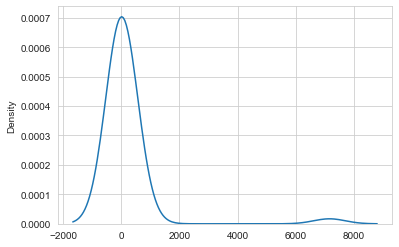

In [33]:
# Generate density plot to see where the majority of the data points lie in terms of Covid-19 case Weekly % change.
sns.set_style('whitegrid')
sns.kdeplot(np.array(mn_mean_df['WoW % CHANGE']), bw=0.5)

In [34]:
merged_mn_cov = mn_df.merge(mn_mean_df, on = ['WEEK #', 'BORO'], how = 'right')
merged_mn_cov = merged_mn_cov.drop(columns = ['WEEKLY_AVG_CASES'])
merged_mn_cov

,DATE,MN_CASE_COUNT,WEEK #,BORO,WoW % CHANGE
0,2020-02-29,1,1,1,NaN
1,2020-03-01,0,1,1,NaN
2,2020-03-02,0,1,1,NaN
3,2020-03-03,0,1,1,NaN
4,2020-03-04,2,1,1,NaN
...,...,...,...,...,...
303,2020-12-28,676,44,1,12.93
304,2020-12-29,612,44,1,12.93
305,2020-12-30,661,44,1,12.93
306,2020-12-31,395,44,1,12.93


In [35]:
merged_ultim_df1 = abbr_numdf.merge(merged_mn_cov, on = ['DATE', 'BORO'], how = 'right')
merged_ultim_df1

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,MN_CASE_COUNT,WEEK #,WoW % CHANGE
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,1,1,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,0,1,NaN
2,1,10036.0,1,0,0,2003.0,2.0,R4,960000.0,2020-03-02,0,1,NaN
3,1,10006.0,1,0,0,1956.0,2.0,R4,590000.0,2020-03-02,0,1,NaN
4,1,10026.0,1,0,0,1989.0,2.0,R4,941881.0,2020-03-02,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,1,10021.0,1,"4,017","11,281",1929.0,1.0,A4,30000000.0,2020-12-31,395,44,12.93
2510,1,10010.0,1,0,0,2007.0,2.0,R4,1711400.0,2020-12-31,395,44,12.93
2511,1,10128.0,1,"1,812","3,993",1899.0,1.0,A4,6375000.0,2020-12-31,395,44,12.93
2512,1,10023.0,1,0,0,2016.0,2.0,R4,3465000.0,2020-12-31,395,44,12.93


In [36]:
# BROOKLYN
bk_df = covidnycdf[['DATE','BK_CASE_COUNT','WEEK #']]
bk_df['BORO'] = 3
bk_grouped_df = bk_df.groupby("WEEK #")
bk_mean_df = bk_grouped_df.mean()
bk_mean_df = bk_mean_df.reset_index()
bk_mean_df = bk_mean_df.rename(columns = {'BK_CASE_COUNT':'WEEKLY_AVG_CASES'})
bk_mean_df['WoW % CHANGE'] = bk_mean_df['WEEKLY_AVG_CASES'].pct_change() * 100
bk_mean_df['WoW % CHANGE'] = bk_mean_df['WoW % CHANGE'].round(2)
bk_mean_df

<ipython-input-36-946e523f5945>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_df['BORO'] = 3


,WEEK #,WEEKLY_AVG_CASES,BORO,WoW % CHANGE
0,1,0.714286,3.0,NaN
1,2,46.714286,3.0,6440.00
2,3,774.714286,3.0,1558.41
3,4,1069.285714,3.0,38.02
4,5,1417.000000,3.0,32.52
5,6,1248.571429,3.0,-11.89
6,7,951.857143,3.0,-23.76
7,8,765.428571,3.0,-19.59
8,9,547.285714,3.0,-28.50
9,10,371.285714,3.0,-32.16


In [37]:
bk_mean_df['BORO'] = bk_mean_df['BORO'].astype('int')
merged_bk_cov = bk_df.merge(bk_mean_df, on = ['WEEK #', 'BORO'], how = 'right')
merged_bk_cov = merged_bk_cov.drop(columns = ['WEEKLY_AVG_CASES'])
merged_ultim_df2 = abbr_numdf.merge(merged_bk_cov, on = ['DATE', 'BORO'], how = 'right')
merged_ultim_df2

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,BK_CASE_COUNT,WEEK #,WoW % CHANGE
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,0,1,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,0,1,NaN
2,3,11201.0,1.0,0,0,2007.0,2.0,R4,10.0,2020-03-02,0,1,NaN
3,3,11221.0,1.0,0,0,2018.0,2.0,R1,565000.0,2020-03-02,0,1,NaN
4,3,11216.0,1.0,0,0,2016.0,2.0,R4,635000.0,2020-03-02,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,3,11229.0,1.0,"2,200","1,780",1945.0,1.0,A5,800000.0,2020-12-31,936,44,18.42
3012,3,11235.0,1.0,0,0,1988.0,1.0,R3,60000.0,2020-12-31,936,44,18.42
3013,3,11206.0,1.0,0,0,2018.0,2.0,R4,847184.0,2020-12-31,936,44,18.42
3014,3,11218.0,1.0,"1,120","1,176",1910.0,1.0,A9,1015000.0,2020-12-31,936,44,18.42


In [38]:
# BRONX
bx_df = covidnycdf[['DATE','BX_CASE_COUNT','WEEK #']]
bx_df['BORO'] = 2
bx_grouped_df = bx_df.groupby("WEEK #")
bx_mean_df = bx_grouped_df.mean()
bx_mean_df = bx_mean_df.reset_index()
bx_mean_df = bx_mean_df.rename(columns = {'BX_CASE_COUNT':'WEEKLY_AVG_CASES'})
bx_mean_df['WoW % CHANGE'] = bx_mean_df['WEEKLY_AVG_CASES'].pct_change() * 100
bx_mean_df['WoW % CHANGE'] = bx_mean_df['WoW % CHANGE'].round(2)
bx_mean_df

<ipython-input-38-5e7d166ee70d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bx_df['BORO'] = 2


,WEEK #,WEEKLY_AVG_CASES,BORO,WoW % CHANGE
0,1,0.285714,2.0,NaN
1,2,20.285714,2.0,7000.00
2,3,383.000000,2.0,1788.03
3,4,828.142857,2.0,116.23
4,5,1148.000000,2.0,38.62
5,6,1232.285714,2.0,7.34
6,7,922.142857,2.0,-25.17
7,8,706.714286,2.0,-23.36
8,9,474.571429,2.0,-32.85
9,10,269.285714,2.0,-43.26


In [39]:
bx_mean_df['BORO'] = bx_mean_df['BORO'].astype('int')
merged_bx_cov = bx_df.merge(bx_mean_df, on = ['WEEK #', 'BORO'], how = 'right')
merged_bx_cov = merged_bx_cov.drop(columns = ['WEEKLY_AVG_CASES'])
merged_ultim_df3 = abbr_numdf.merge(merged_bx_cov, on = ['DATE', 'BORO'], how = 'right')
merged_ultim_df3

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,BX_CASE_COUNT,WEEK #,WoW % CHANGE
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,0,1,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,0,1,NaN
2,2,10458.0,1.0,"1,095","1,260",1910.0,1.0,A9,165000.0,2020-03-02,0,1,NaN
3,2,10461.0,1.0,"2,600","1,400",1940.0,1.0,A5,410000.0,2020-03-03,0,1,NaN
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2,10473.0,1.0,0,0,1989.0,2.0,R2,375000.0,2020-12-30,967,44,41.57
519,2,10466.0,1.0,"2,100","1,536",1950.0,1.0,A5,435000.0,2020-12-30,967,44,41.57
520,2,10461.0,1.0,0,0,1963.0,2.0,R4,170000.0,2020-12-30,967,44,41.57
521,2,10473.0,1.0,"1,800","1,152",1965.0,1.0,A5,500000.0,2020-12-31,663,44,41.57


In [40]:
# QUEENS
qn_df = covidnycdf[['DATE','QN_CASE_COUNT','WEEK #']]
qn_df['BORO'] = 4
qn_grouped_df = qn_df.groupby("WEEK #")
qn_mean_df = qn_grouped_df.mean()
qn_mean_df = qn_mean_df.reset_index()
qn_mean_df = qn_mean_df.rename(columns = {'QN_CASE_COUNT':'WEEKLY_AVG_CASES'})
qn_mean_df['WoW % CHANGE'] = qn_mean_df['WEEKLY_AVG_CASES'].pct_change() * 100
qn_mean_df['WoW % CHANGE'] = qn_mean_df['WoW % CHANGE'].round(2)
qn_mean_df

<ipython-input-40-a4ae42bd58d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qn_df['BORO'] = 4


,WEEK #,WEEKLY_AVG_CASES,BORO,WoW % CHANGE
0,1,0.571429,4.0,NaN
1,2,47.000000,4.0,8125.00
2,3,669.714286,4.0,1324.92
3,4,1288.142857,4.0,92.34
4,5,1616.285714,4.0,25.47
5,6,1567.428571,4.0,-3.02
6,7,1085.142857,4.0,-30.77
7,8,915.571429,4.0,-15.63
8,9,628.142857,4.0,-31.39
9,10,375.857143,4.0,-40.16


In [41]:
qn_mean_df['BORO'] = qn_mean_df['BORO'].astype('int')
merged_qn_cov = qn_df.merge(qn_mean_df, on = ['WEEK #', 'BORO'], how = 'right')
merged_qn_cov = merged_qn_cov.drop(columns = ['WEEKLY_AVG_CASES'])
merged_ultim_df4 = abbr_numdf.merge(merged_qn_cov, on = ['DATE', 'BORO'], how = 'right')
merged_ultim_df4

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,QN_CASE_COUNT,WEEK #,WoW % CHANGE
0,4,11377.0,1.0,"2,100","1,384",1930.0,1.0,A5,50.0,2020-02-29,0,1,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,0,1,NaN
2,4,11421.0,1.0,0,0,1978.0,1.0,R3,935000.0,2020-03-02,0,1,NaN
3,4,11101.0,1.0,0,0,2018.0,2.0,R1,1250000.0,2020-03-02,0,1,NaN
4,4,11379.0,1.0,"1,600","1,110",1940.0,1.0,A5,692800.0,2020-03-02,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,4,11413.0,1.0,"2,100","1,752",1940.0,1.0,A5,585000.0,2020-12-31,1010,44,26.19
2306,4,11367.0,1.0,"2,000","1,344",1940.0,1.0,A5,999000.0,2020-12-31,1010,44,26.19
2307,4,11355.0,1.0,0,0,1962.0,2.0,R4,465000.0,2020-12-31,1010,44,26.19
2308,4,11364.0,1.0,0,0,1949.0,2.0,R2,520000.0,2020-12-31,1010,44,26.19


In [42]:
# STATEN ISLAND
si_df = covidnycdf[['DATE','SI_CASE_COUNT','WEEK #']]
si_df['BORO'] = 5
si_grouped_df = si_df.groupby("WEEK #")
si_mean_df = si_grouped_df.mean()
si_mean_df = si_mean_df.reset_index()
si_mean_df = si_mean_df.rename(columns = {'SI_CASE_COUNT':'WEEKLY_AVG_CASES'})
si_mean_df['WoW % CHANGE'] = si_mean_df['WEEKLY_AVG_CASES'].pct_change() * 100
si_mean_df['WoW % CHANGE'] = si_mean_df['WoW % CHANGE'].round(2)
si_mean_df

<ipython-input-42-2eef552988d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si_df['BORO'] = 5


,WEEK #,WEEKLY_AVG_CASES,BORO,WoW % CHANGE
0,1,0.142857,5.0,NaN
1,2,7.000000,5.0,4800.00
2,3,141.000000,5.0,1914.29
3,4,327.571429,5.0,132.32
4,5,301.285714,5.0,-8.02
5,6,455.571429,5.0,51.21
6,7,263.714286,5.0,-42.11
7,8,167.285714,5.0,-36.57
8,9,100.428571,5.0,-39.97
9,10,61.142857,5.0,-39.12


In [43]:
si_mean_df['BORO'] = si_mean_df['BORO'].astype('int')
merged_si_cov = si_df.merge(si_mean_df, on = ['WEEK #', 'BORO'], how = 'right')
merged_si_cov = merged_si_cov.drop(columns = ['WEEKLY_AVG_CASES'])
merged_ultim_df5 = abbr_numdf.merge(merged_si_cov, on = ['DATE', 'BORO'], how = 'right')
merged_ultim_df5

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,SI_CASE_COUNT,WEEK #,WoW % CHANGE
0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,0,1,NaN
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,0,1,NaN
2,5,10310.0,1.0,"1,996","1,200",2014.0,1.0,A5,505000.0,2020-03-02,0,1,NaN
3,5,10306.0,1.0,"1,986","1,200",1998.0,1.0,A5,568000.0,2020-03-02,0,1,NaN
4,5,10314.0,1.0,"2,038","1,925",2014.0,1.0,A5,609999.0,2020-03-02,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,5,10312.0,1.0,"6,673","1,552",2011.0,1.0,A5,680000.0,2020-12-31,386,44,35.7
1737,5,10314.0,1.0,"2,288","1,372",1981.0,1.0,A5,363000.0,2020-12-31,386,44,35.7
1738,5,10304.0,1.0,555,"1,150",2004.0,1.0,A5,450000.0,2020-12-31,386,44,35.7
1739,5,10314.0,1.0,"3,168","1,120",1963.0,1.0,A5,535000.0,2020-12-31,386,44,35.7


In [44]:
# FINAL DATA FRAME combining all boroughs
final_df = pd.concat([merged_ultim_df1, merged_ultim_df2, merged_ultim_df3, merged_ultim_df4, merged_ultim_df5], ignore_index = True)
final_df = final_df.sort_values(by = ['DATE'], ascending = True, ignore_index = True)
final_df = final_df.drop(columns = ['MN_CASE_COUNT', 'BK_CASE_COUNT', 'BX_CASE_COUNT', 'QN_CASE_COUNT', 'SI_CASE_COUNT'] )
final_df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,WEEK #,WoW % CHANGE
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,1,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,1,NaN
2,4,11377.0,1.0,"2,100","1,384",1930.0,1.0,A5,50.0,2020-02-29,1,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,1,NaN
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10099,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,44,41.57
10100,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,44,26.19
10101,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,44,12.93
10102,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,44,18.42


In [45]:
# Drop nulls values
final_df = final_df.dropna()
final_df = final_df.reset_index()
final_df = final_df.drop(columns = ['index'])
final_df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,WEEK #,WoW % CHANGE
0,4,11379.0,1.0,"2,075","1,160",1940.0,1.0,A5,10.0,2020-03-09,2,8125.00
1,4,11367.0,1.0,"2,642","1,296",1950.0,1.0,A5,770000.0,2020-03-09,2,8125.00
2,4,11417.0,1.0,0,0,1987.0,1.0,R3,440000.0,2020-03-09,2,8125.00
3,4,11101.0,1.0,0,0,2016.0,2.0,R2,997885.0,2020-03-09,2,8125.00
4,4,11101.0,1.0,0,0,2018.0,2.0,R4,1025000.0,2020-03-09,2,8125.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9329,3,11216.0,1.0,0,0,2012.0,2.0,R4,630000.0,2020-12-31,44,18.42
9330,3,11221.0,1.0,0,0,2018.0,2.0,R1,649000.0,2020-12-31,44,18.42
9331,3,11222.0,1.0,0,0,2016.0,2.0,R1,968000.0,2020-12-31,44,18.42
9332,3,11222.0,1.0,0,0,2016.0,2.0,R1,645000.0,2020-12-31,44,18.42


In [46]:
final_df['ZIP CODE'] = final_df['ZIP CODE'].astype('int')
final_df['YEAR BUILT'] = final_df['YEAR BUILT'].astype('int')
final_df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,WEEK #,WoW % CHANGE
0,4,11379,1.0,"2,075","1,160",1940,1.0,A5,10.0,2020-03-09,2,8125.00
1,4,11367,1.0,"2,642","1,296",1950,1.0,A5,770000.0,2020-03-09,2,8125.00
2,4,11417,1.0,0,0,1987,1.0,R3,440000.0,2020-03-09,2,8125.00
3,4,11101,1.0,0,0,2016,2.0,R2,997885.0,2020-03-09,2,8125.00
4,4,11101,1.0,0,0,2018,2.0,R4,1025000.0,2020-03-09,2,8125.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9329,3,11216,1.0,0,0,2012,2.0,R4,630000.0,2020-12-31,44,18.42
9330,3,11221,1.0,0,0,2018,2.0,R1,649000.0,2020-12-31,44,18.42
9331,3,11222,1.0,0,0,2016,2.0,R1,968000.0,2020-12-31,44,18.42
9332,3,11222,1.0,0,0,2016,2.0,R1,645000.0,2020-12-31,44,18.42


In [47]:
nonzero_sqft = final_df[(final_df['LAND SQFT'] != '0') & (final_df['GROSS SQFT'] != '0')]
nonzero_sqft

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,DATE,WEEK #,WoW % CHANGE
0,4,11379,1.0,"2,075","1,160",1940,1.0,A5,10.0,2020-03-09,2,8125.00
1,4,11367,1.0,"2,642","1,296",1950,1.0,A5,770000.0,2020-03-09,2,8125.00
5,4,11412,1.0,"2,000","1,200",1935,1.0,A5,530000.0,2020-03-09,2,8125.00
7,4,11367,1.0,"2,080","1,530",1945,1.0,A5,715000.0,2020-03-09,2,8125.00
8,4,11373,1.0,"1,610","1,448",1925,1.0,A5,898000.0,2020-03-09,2,8125.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9308,4,11411,1.0,"2,142",882,1935,1.0,A5,440000.0,2020-12-31,44,26.19
9315,1,10021,1,"4,017","11,281",1929,1.0,A4,30000000.0,2020-12-31,44,12.93
9317,1,10128,1,"1,812","3,993",1899,1.0,A4,6375000.0,2020-12-31,44,12.93
9319,5,10314,1.0,"3,168","1,120",1963,1.0,A5,535000.0,2020-12-31,44,35.70


# Visualizations

In [48]:
nonzero_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442 entries, 0 to 9322
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BORO                            3442 non-null   int64         
 1   ZIP CODE                        3442 non-null   int32         
 2   RESIDENTIAL UNITS               3442 non-null   object        
 3   LAND SQFT                       3442 non-null   object        
 4   GROSS SQFT                      3442 non-null   object        
 5   YEAR BUILT                      3442 non-null   int32         
 6   TAX CLASS AT TIME OF SALE       3442 non-null   float64       
 7   BUILDING CLASS AT TIME OF SALE  3442 non-null   object        
 8   SALE PRICE                      3442 non-null   float64       
 9   DATE                            3442 non-null   datetime64[ns]
 10  WEEK #                          3442 non-null   int64         
 11  WoW 

In [49]:
nonzero_sqft['RESIDENTIAL UNITS'] = nonzero_sqft['RESIDENTIAL UNITS'].astype('int')
nonzero_sqft['LAND SQFT'] = nonzero_sqft['LAND SQFT'].replace(',','', regex=True)
nonzero_sqft['LAND SQFT'] = nonzero_sqft['LAND SQFT'].astype('int')
nonzero_sqft['GROSS SQFT'] = nonzero_sqft['GROSS SQFT'].replace(',','', regex=True)
nonzero_sqft['GROSS SQFT'] = nonzero_sqft['GROSS SQFT'].astype('int')
nonzero_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442 entries, 0 to 9322
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BORO                            3442 non-null   int64         
 1   ZIP CODE                        3442 non-null   int32         
 2   RESIDENTIAL UNITS               3442 non-null   int32         
 3   LAND SQFT                       3442 non-null   int32         
 4   GROSS SQFT                      3442 non-null   int32         
 5   YEAR BUILT                      3442 non-null   int32         
 6   TAX CLASS AT TIME OF SALE       3442 non-null   float64       
 7   BUILDING CLASS AT TIME OF SALE  3442 non-null   object        
 8   SALE PRICE                      3442 non-null   float64       
 9   DATE                            3442 non-null   datetime64[ns]
 10  WEEK #                          3442 non-null   int64         
 11  WoW 

<ipython-input-49-29c49d59e52e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_sqft['RESIDENTIAL UNITS'] = nonzero_sqft['RESIDENTIAL UNITS'].astype('int')
<ipython-input-49-29c49d59e52e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_sqft['LAND SQFT'] = nonzero_sqft['LAND SQFT'].replace(',','', regex=True)
<ipython-input-49-29c49d59e52e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [50]:
nonzero_sqft = nonzero_sqft.drop(columns = ['BUILDING CLASS AT TIME OF SALE','TAX CLASS AT TIME OF SALE'])
nonzero_sqft.head()

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,DATE,WEEK #,WoW % CHANGE
0,4,11379,1,2075,1160,1940,10.0,2020-03-09,2,8125.0
1,4,11367,1,2642,1296,1950,770000.0,2020-03-09,2,8125.0
5,4,11412,1,2000,1200,1935,530000.0,2020-03-09,2,8125.0
7,4,11367,1,2080,1530,1945,715000.0,2020-03-09,2,8125.0
8,4,11373,1,1610,1448,1925,898000.0,2020-03-09,2,8125.0


In [51]:
nonzero_sqft['DATE'] = nonzero_sqft['DATE'].map(datetime.toordinal)
nonzero_sqft.head()

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,DATE,WEEK #,WoW % CHANGE
0,4,11379,1,2075,1160,1940,10.0,737493,2,8125.0
1,4,11367,1,2642,1296,1950,770000.0,737493,2,8125.0
5,4,11412,1,2000,1200,1935,530000.0,737493,2,8125.0
7,4,11367,1,2080,1530,1945,715000.0,737493,2,8125.0
8,4,11373,1,1610,1448,1925,898000.0,737493,2,8125.0


<Axes: >

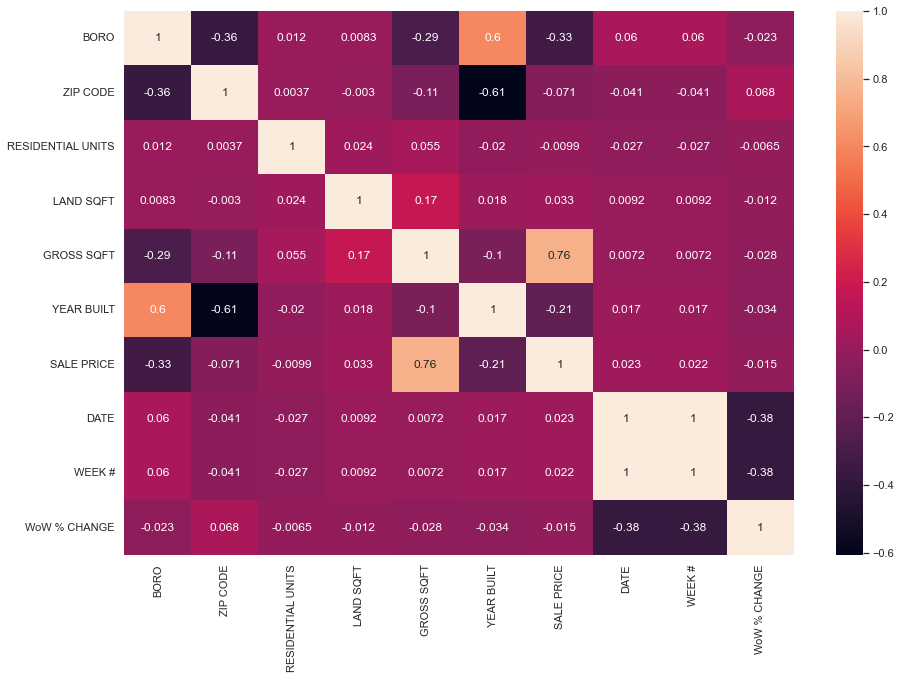

In [52]:
corr_matrix = nonzero_sqft.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, annot=True)

In [53]:
col_names = nonzero_sqft.columns
params = []
correlation = []
abs_correlation = []
for col in col_names:
    if col != "SALE PRICE":
        if len(nonzero_sqft[col].unique()) <= 2:
            corr = spearmanr(nonzero_sqft['SALE PRICE'], nonzero_sqft[col])[0]
        else:
            corr = pointbiserialr(nonzero_sqft['SALE PRICE'], nonzero_sqft[col])[0]
        params.append(col)
        correlation.append(corr)
        abs_correlation.append(abs(corr))
params_df = pd.DataFrame({'correlation':correlation, 'parameter': params, 'abs_correlation': abs_correlation})
params_df = params_df.sort_values(by = ['abs_correlation'], ascending = False)
params_df = params_df.set_index('parameter')
params_df

,correlation,abs_correlation
parameter,,
GROSS SQFT,0.760311,0.760311
BORO,-0.326637,0.326637
YEAR BUILT,-0.205667,0.205667
ZIP CODE,-0.071396,0.071396
LAND SQFT,0.032939,0.032939
RESIDENTIAL UNITS,-0.025163,0.025163
DATE,0.022583,0.022583
WEEK #,0.022148,0.022148
WoW % CHANGE,-0.014958,0.014958


In [54]:
# Scale data
scaler = StandardScaler()
scaler.fit(nonzero_sqft)

StandardScaler()

In [55]:
scaled_data = scaler.transform(nonzero_sqft)
scaled_data

array([[ 0.10011887,  1.04546249, -0.02953551, ..., -1.9694431 ,
        -1.94471058,  6.83504052],
       [ 0.10011887,  1.02134896, -0.02953551, ..., -1.9694431 ,
        -1.94471058,  6.83504052],
       [ 0.10011887,  1.11177469, -0.02953551, ..., -1.9694431 ,
        -1.94471058,  6.83504052],
       ...,
       [-2.79575648, -1.46837281, -0.02953551, ...,  1.40402684,
         1.39196741, -0.19830427],
       [ 1.06541066, -1.09461312, -0.02953551, ...,  1.40402684,
         1.39196741, -0.17856217],
       [-0.86517291,  0.69179741, -0.02953551, ...,  1.40402684,
         1.39196741, -0.19354432]])

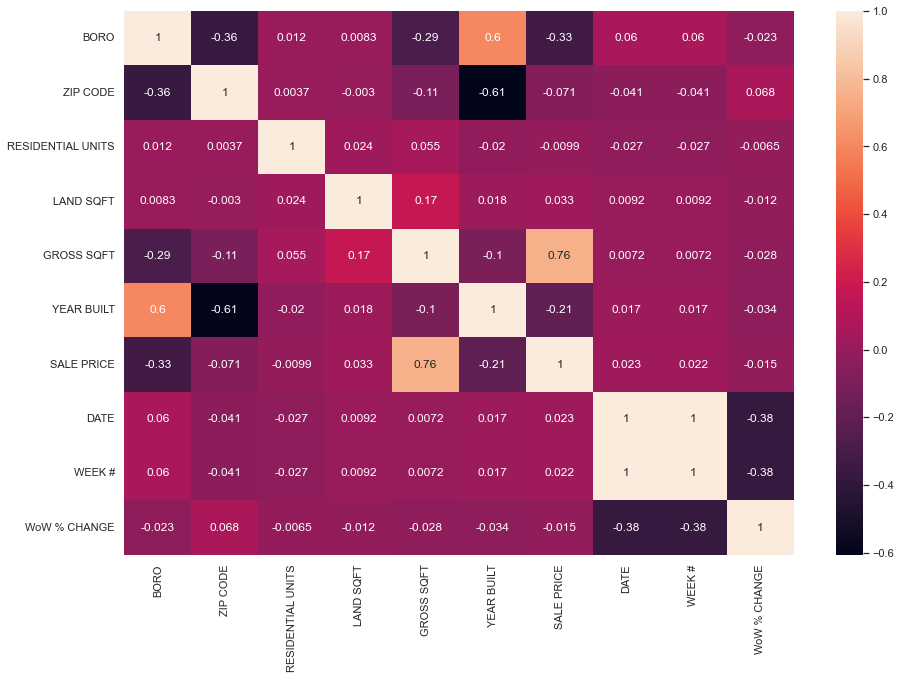

In [56]:
# Correlation Matrix
corr_matrix = nonzero_sqft.corr()
sns.heatmap(corr_matrix, annot=True)
plt.pyplot.show()

In [57]:
#Export DataFrame to CSV
#nonzero_sqft.to_csv('nyc_full_clean_2.csv', index=False)